In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun May 25 12:37:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P0             25W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install --upgrade --quiet pip
!pip install --upgrade --quiet datasets[audio] transformers accelerate evaluate jiwer tensorboard gradio
!pip install huggingface_hub

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.8/1.8 MB 21.3 MB/s eta 0:00:0000:010:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.5/10.5 MB 102.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.5/5.5 MB 120.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 54.2/54.2 MB 119.0 MB/s eta 0:00:0000:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.1/3.1 MB 90.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11.5/11.5 MB 141.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [ ]:
from huggingface_hub import notebook_login
from datasets import Dataset, DatasetDict, Audio
import pandas as pd
import unicodedata
import re
from transformers import WhisperFeatureExtractor, WhisperTokenizer, WhisperProcessor, WhisperForConditionalGeneration, Seq2SeqTrainingArguments, Seq2SeqTrainer
from datasets import Audio
import torch
from dataclasses import dataclass
from typing import Any, Dict, List, Union
import evaluate
import matplotlib.pyplot as plt

In [ ]:
notebook_login()

## Load Dataset

In [ ]:
dir_path = '/kaggle/input/voice-for-smart-home-vietnamese/dataset_custom/vi'

def load_common_voice_tsv(dir_path):
    # Load tsv
    train_df = pd.read_csv(f'{dir_path}/train.tsv', sep='\t')
    val_df = pd.read_csv(f'{dir_path}/dev.tsv', sep='\t')
    test_df = pd.read_csv(f'{dir_path}/test.tsv', sep='\t')

    for df in [train_df, val_df, test_df]:
        df.dropna(subset=["path", "sentence"], inplace=True)  # tr√°nh l·ªói thi·∫øu d·ªØ li·ªáu

    train_df['audio'] = f'{dir_path}/clip/' + train_df['path']
    val_df['audio'] = f'{dir_path}/clip/' + val_df['path']
    test_df['audio'] = f'{dir_path}/clip/' + test_df['path']

    dataset = DatasetDict({
        'train': Dataset.from_pandas(train_df),
        'val': Dataset.from_pandas(val_df),
        'test': Dataset.from_pandas(test_df)
    })

    return dataset

def normalize_text(batch):
    text = batch["sentence"]
    text = text.lower()
    text = unicodedata.normalize("NFC", text)
    text = re.sub(r"[^\w\s√†√°·∫£√£·∫°ƒÉ·∫Ø·∫±·∫≥·∫µ·∫∑√¢·∫•·∫ß·∫©·∫´·∫≠√®√©·∫ª·∫Ω·∫π√™·∫ø·ªÅ·ªÉ·ªÖ·ªá√¨√≠·ªâƒ©·ªã√≤√≥·ªè√µ·ªç√¥·ªë·ªì·ªï·ªó·ªô∆°·ªõ·ªù·ªü·ª°·ª£√π√∫·ªß≈©·ª•∆∞·ª©·ª´·ª≠·ªØ·ª±·ª≥√Ω·ª∑·ªπ·ªµƒë]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    batch["sentence"] = text
    return batch

def preprocess_common_voice():
    dataset = load_common_voice_tsv(dir_path)

    dataset = dataset.map(normalize_text)

    dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))

    return dataset


In [6]:
common_voice = preprocess_common_voice()
common_voice = common_voice.remove_columns(["accents", "client_id", "gender", "locale", "path", "url", "sentence_id"])

print(common_voice)

Map:   0%|          | 0/350 [00:00<?, ? examples/s]

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'audio'],
        num_rows: 350
    })
    val: Dataset({
        features: ['sentence', 'audio'],
        num_rows: 150
    })
    test: Dataset({
        features: ['sentence', 'audio'],
        num_rows: 100
    })
})


## Prepare Feature Extractor, Tokenizer and Data

In [ ]:
feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small")
print(feature_extractor)

WhisperFeatureExtractor {
  "chunk_length": 30,
  "dither": 0.0,
  "feature_extractor_type": "WhisperFeatureExtractor",
  "feature_size": 80,
  "hop_length": 160,
  "n_fft": 400,
  "n_samples": 480000,
  "nb_max_frames": 3000,
  "padding_side": "right",
  "padding_value": 0.0,
  "processor_class": "WhisperProcessor",
  "return_attention_mask": false,
  "sampling_rate": 16000
}



In [ ]:
tokenizer = WhisperTokenizer.from_pretrained("openai/whisper-small", language="vietnamese", task="transcribe")
print(tokenizer)

WhisperTokenizer(name_or_path='openai/whisper-small', vocab_size=50258, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>', 'additional_special_tokens': ['<|endoftext|>', '<|startoftranscript|>', '<|en|>', '<|zh|>', '<|de|>', '<|es|>', '<|ru|>', '<|ko|>', '<|fr|>', '<|ja|>', '<|pt|>', '<|tr|>', '<|pl|>', '<|ca|>', '<|nl|>', '<|ar|>', '<|sv|>', '<|it|>', '<|id|>', '<|hi|>', '<|fi|>', '<|vi|>', '<|he|>', '<|uk|>', '<|el|>', '<|ms|>', '<|cs|>', '<|ro|>', '<|da|>', '<|hu|>', '<|ta|>', '<|no|>', '<|th|>', '<|ur|>', '<|hr|>', '<|bg|>', '<|lt|>', '<|la|>', '<|mi|>', '<|ml|>', '<|cy|>', '<|sk|>', '<|te|>', '<|fa|>', '<|lv|>', '<|bn|>', '<|sr|>', '<|az|>', '<|sl|>', '<|kn|>', '<|et|>', '<|mk|>', '<|br|>', '<|eu|>', '<|is|>', '<|hy|>', '<|ne|>', '<|mn|>', '<|bs|>', '<|kk|>', '<|sq|>', '<|sw|>', '<|gl|>', '<|mr|>', '<|pa|>', '<|si

In [ ]:
processor = WhisperProcessor.from_pretrained("openai/whisper-small", language="vietnamese", task="transcribe")
print(processor)

WhisperProcessor:
- feature_extractor: WhisperFeatureExtractor {
  "chunk_length": 30,
  "dither": 0.0,
  "feature_extractor_type": "WhisperFeatureExtractor",
  "feature_size": 80,
  "hop_length": 160,
  "n_fft": 400,
  "n_samples": 480000,
  "nb_max_frames": 3000,
  "padding_side": "right",
  "padding_value": 0.0,
  "processor_class": "WhisperProcessor",
  "return_attention_mask": false,
  "sampling_rate": 16000
}

- tokenizer: WhisperTokenizer(name_or_path='openai/whisper-small', vocab_size=50258, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>', 'additional_special_tokens': ['<|endoftext|>', '<|startoftranscript|>', '<|en|>', '<|zh|>', '<|de|>', '<|es|>', '<|ru|>', '<|ko|>', '<|fr|>', '<|ja|>', '<|pt|>', '<|tr|>', '<|pl|>', '<|ca|>', '<|nl|>', '<|ar|>', '<|sv|>', '<|it|>', '<|id|>', '<|hi|>', '<|fi|>', '<|vi|>', '<

### Prepare Data

In [ ]:
common_voice = common_voice.cast_column("audio", Audio(sampling_rate=16000))

In [12]:
print(common_voice["train"][0])

{'sentence': 'h·∫πn gi·ªù t·∫Øt qu·∫°t sau 15 ph√∫t', 'audio': {'path': '/kaggle/input/voice-for-smart-home-vietnamese/dataset_custom/vi/clip/00b3d0849955ffda0d60620e24abf62c.wav', 'array': array([ 5.49316406e-04,  3.05175781e-05,  0.00000000e+00, ...,
       -1.52587891e-04,  2.74658203e-04, -1.34277344e-03]), 'sampling_rate': 16000}}


In [ ]:
def prepare_dataset(batch):
    audio = batch["audio"]

    batch["input_features"] = feature_extractor(audio["array"], sampling_rate=audio["sampling_rate"]).input_features[0]

    batch["labels"] = tokenizer(batch["sentence"]).input_ids
    return batch

In [14]:
common_voice = common_voice.map(prepare_dataset, remove_columns=common_voice.column_names["train"], num_proc=2)

Map (num_proc=2):   0%|          | 0/350 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/150 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/100 [00:00<?, ? examples/s]

## Training and Evaluation

In [ ]:
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small")
print(model)

WhisperForConditionalGeneration(
  (model): WhisperModel(
    (encoder): WhisperEncoder(
      (conv1): Conv1d(80, 768, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(768, 768, kernel_size=(3,), stride=(2,), padding=(1,))
      (embed_positions): Embedding(1500, 768)
      (layers): ModuleList(
        (0-11): 12 x WhisperEncoderLayer(
          (self_attn): WhisperSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=False)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
        

In [16]:
model.generation_config.language = "vietnamese"
model.generation_config.task = "transcribe"

model.generation_config.forced_decoder_ids = None

### Define a Data Collator

In [ ]:
@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any
    decoder_start_token_id: int

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_features": feature["input_features"]} for feature in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")
        batch["attention_mask"] = torch.ones(batch["input_features"].shape[:-1], dtype=torch.long)

        label_features = [{"input_ids": feature["labels"]} for feature in features]
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")

        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)

        if (labels[:, 0] == self.decoder_start_token_id).all().cpu().item():
            labels = labels[:, 1:]

        batch["labels"] = labels

        return batch

In [18]:
data_collator = DataCollatorSpeechSeq2SeqWithPadding(
    processor=processor,
    decoder_start_token_id=model.config.decoder_start_token_id,
)

### Evaluation Metrics

In [ ]:
metric = evaluate.load("wer")

In [ ]:
def compute_metrics(pred):
    pred_ids = pred.predictions
    label_ids = pred.label_ids

    label_ids[label_ids == -100] = tokenizer.pad_token_id

    pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    label_str = tokenizer.batch_decode(label_ids, skip_special_tokens=True)

    wer =  metric.compute(predictions=pred_str, references=label_str)
    return {"wer": wer}

### Define the Training Configuration

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="./whisper-small-vi",
    per_device_train_batch_size=16,
    gradient_accumulation_steps=1,
    learning_rate=1e-5,
    lr_scheduler_type="linear",
    warmup_steps=500,
    num_train_epochs=10,
    gradient_checkpointing=True,
    fp16=True,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    per_device_eval_batch_size=8,
    predict_with_generate=True,
    generation_max_length=32,
    report_to=["tensorboard"],
    save_total_limit=3,
    load_best_model_at_end=True,
    metric_for_best_model="wer",
    greater_is_better=False,
    push_to_hub=True,
)

In [ ]:
trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=common_voice["train"],
    eval_dataset=common_voice["val"],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    processing_class=processor,
)

In [24]:
processor.save_pretrained(training_args.output_dir)

[]

### Training

In [25]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
`use_cache = True` is incompatible with gradient checkpointing. Setting `use_cache = False`...


You have passed task=transcribe, but also have set `forced_decoder_ids` to [[1, 50259], [2, 50359], [3, 50363]] which creates a conflict. `forced_decoder_ids` will be ignored in favor of task=transcribe.
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3464: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [1, 2, 7, 8, 9, 10, 14, 25, 26, 27, 28, 29, 31, 58, 59, 60, 61, 62, 63, 90, 91, 92, 93, 359, 503, 522, 542, 873, 893, 902, 918, 922, 931, 1350, 1853, 1982, 2460, 2627, 3246, 3253, 3268, 3536, 3846, 3961, 4183, 4667, 6585, 6647, 7273, 9061, 9383, 10428, 10929, 11938, 12033, 12331, 12562, 13793, 14157, 14635, 15265, 15618, 16553, 16604, 18362, 18956, 20075, 21675, 22520, 26130, 26161, 26435, 28279, 29464, 31650, 32302, 32470, 36865, 42863, 47425, 49870, 50254, 50258, 50360, 50361, 50362], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation param

TrainOutput(global_step=220, training_loss=0.3581483755599369, metrics={'train_runtime': 1946.2117, 'train_samples_per_second': 1.798, 'train_steps_per_second': 0.113, 'total_flos': 1.01004890112e+18, 'train_loss': 0.3581483755599369, 'epoch': 10.0})

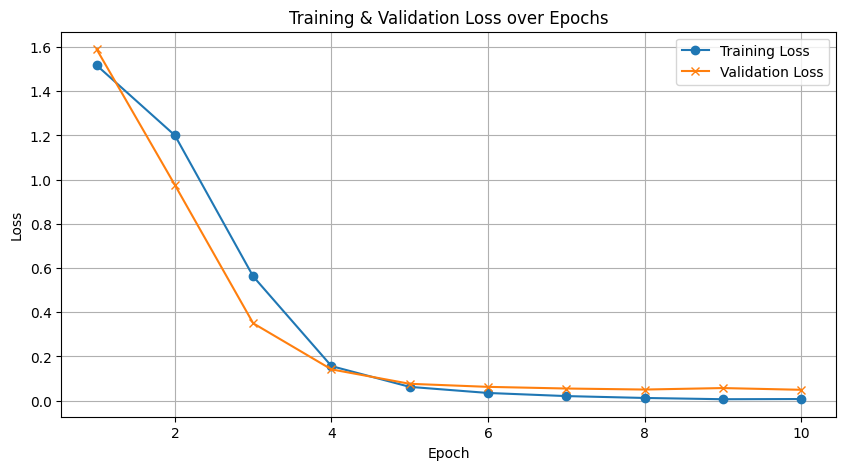

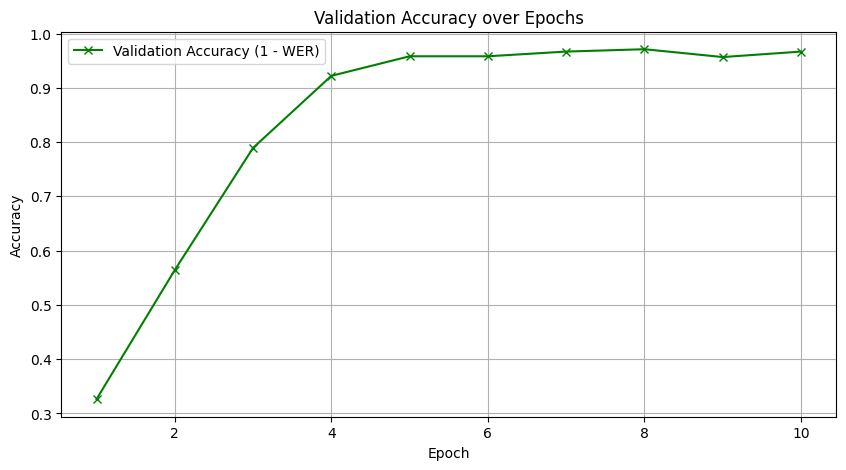

{'wer': 0.047619047619047616}
Test WER: 0.0476 (4.76%)
Test Accuracy (1 - WER): 0.9524 (95.24%)

‚ñ∂Ô∏è Audio 2
üß† Predict: m·ªü c·ª≠a kia tr·ªùi n√≥ng
‚úÖ Ground truth: m·ªü c·ª≠a khi tr·ªùi n√≥ng

‚ñ∂Ô∏è Audio 15
üß† Predict: t·ª± s·∫Øp ra ngo√†i
‚úÖ Ground truth: t√¥i s·∫Øp ra ngo√†i

‚ñ∂Ô∏è Audio 20
üß† Predict: tr·ªùi t·ªëi tr·ªùi b·∫≠t ƒë√®n gi√∫p t√¥i
‚úÖ Ground truth: tr·ªùi t·ªëi r·ªìi b·∫≠t ƒë√®n gi√∫p t√¥i

‚ñ∂Ô∏è Audio 29
üß† Predict: t√¥i ra kh·ªèi nh√† d·ªìi
‚úÖ Ground truth: t√¥i ra kh·ªèi nh√† r·ªìi

‚ñ∂Ô∏è Audio 32
üß† Predict: d·ªùi t·ªëi r·ªìi m·∫≠t ƒë√®n gi√∫p t√¥i
‚úÖ Ground truth: tr·ªùi t·ªëi r·ªìi b·∫≠t ƒë√®n gi√∫p t√¥i

‚ñ∂Ô∏è Audio 37
üß† Predict: b·∫≠t ƒë√®n k√¨a s√°ng y·∫øu
‚úÖ Ground truth: b·∫≠t ƒë√®n khi √°nh s√°ng y·∫øu

‚ñ∂Ô∏è Audio 38
üß† Predict: t√¥i gi·ªù v·ªÅ ƒë·∫øn nh√†
‚úÖ Ground truth: t√¥i v·ª´a v·ªÅ ƒë·∫øn nh√†

‚ñ∂Ô∏è Audio 39
üß† Predict: b·∫≠t c·ª≠a
‚úÖ Ground truth: m·ªü c·ª≠a

‚ñ∂Ô∏è Audio 43
üß† Predict: b·∫≠t ƒë√®n d·∫° bu·ªïi

In [ ]:
log_history = trainer.state.log_history
train_loss_steps = []
train_losses = []
eval_loss_steps = []
eval_losses = []
eval_wers = []

for log in log_history:
    if "loss" in log and "epoch" in log:  # training loss
        train_loss_steps.append(log["epoch"])
        train_losses.append(log["loss"])
    if "eval_loss" in log:
        eval_loss_steps.append(log["epoch"])
        eval_losses.append(log["eval_loss"])
    if "eval_wer" in log:
        eval_wers.append((log["epoch"], log["eval_wer"]))

# === Bi·ªÉu ƒë·ªì LOSS (Train + Validation) ===
plt.figure(figsize=(10, 5))
plt.plot(train_loss_steps, train_losses, label="Training Loss", marker="o")
plt.plot(eval_loss_steps, eval_losses, label="Validation Loss", marker="x")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss over Epochs")
plt.grid(True)
plt.legend()
plt.show()

# === Bi·ªÉu ƒë·ªì ACCURACY (Train + Validation) ===
if eval_wers:
    eval_epochs, eval_wer_values = zip(*eval_wers)
    eval_acc_values = [1 - wer for wer in eval_wer_values]

    plt.figure(figsize=(10, 5))
    plt.plot(eval_epochs, eval_acc_values, label="Validation Accuracy (1 - WER)", marker="x", color="green")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Validation Accuracy over Epochs")
    plt.grid(True)
    plt.legend()
    plt.show()

# D·ª± ƒëo√°n tr√™n t·∫≠p test
pred = trainer.predict(test_dataset=common_voice["test"])
metrics = compute_metrics(pred)
print(metrics)

# Hi·ªÉn th·ªã WER v√† Accuracy
print(f"Test WER: {metrics['wer']:.4f} ({metrics['wer'] * 100:.2f}%)")
print(f"Test Accuracy (1 - WER): {1 - metrics['wer']:.4f} ({(1 - metrics['wer']) * 100:.2f}%)")

Push model l√™n Hugging face

In [ ]:
kwargs = {
    # "dataset_tags": "mozilla-foundation/common_voice_17_0",
    "dataset": "Custom dataset for ASR",
    "dataset_args": "config: vi, split: test",
    "language": "vi",
    "model_name": "Whisper Small Vi - tuan8p",
    "finetuned_from": "openai/whisper-small",
    "tasks": "automatic-speech-recognition",
}

In [28]:
trainer.push_to_hub(**kwargs)

CommitInfo(commit_url='https://huggingface.co/tuan8p/whisper-small-vi/commit/95277fbf919aa59f13d8f6fa59d429c3610b3342', commit_message='End of training', commit_description='', oid='95277fbf919aa59f13d8f6fa59d429c3610b3342', pr_url=None, repo_url=RepoUrl('https://huggingface.co/tuan8p/whisper-small-vi', endpoint='https://huggingface.co', repo_type='model', repo_id='tuan8p/whisper-small-vi'), pr_revision=None, pr_num=None)